# Creating Discrete Bayesian Networks

Defining a Discrete Bayesian Network (BN) involves specifying the network structure and its parameterization in terms of Tabular Conditional Probability Distributions(CPDs), also known as Conditional Probability Tables (CPTs).

There are few ways to define a BN in pgmpy:
1. Load an example model from bnlearn repository (https://www.bnlearn.com/bnrepository/).
2. Define the network manually.
3. Generate a random network.

# 1. Load an Example Model

pgmpy provides a method `pgmpy.utils.get_example_model` to quickly load any model from the bnlearn repository: https://www.bnlearn.com/bnrepository/

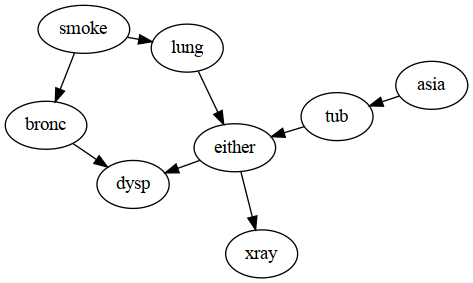

In [1]:
# Imports
from IPython.display import Image
from pgmpy.utils import get_example_model

# Load the model
asia_model = get_example_model('asia')

# Visualize the network
viz = asia_model.to_graphviz()
viz.draw('asia.png', prog='neato')
Image('asia.png')

In [2]:
import pprint

# Access attributes of the model
nodes = asia_model.nodes()
edges = asia_model.edges()
cpds = asia_model.get_cpds()

print(f"Nodes in the model: {nodes} \n")
print(f"Edges in the model: {edges} \n")
print(f"CPDs in the model: ")
pprint.pp(cpds)

Nodes in the model: ['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp'] 

Edges in the model: [('asia', 'tub'), ('tub', 'either'), ('smoke', 'lung'), ('smoke', 'bronc'), ('lung', 'either'), ('bronc', 'dysp'), ('either', 'xray'), ('either', 'dysp')] 

CPDs in the model: 
[<TabularCPD representing P(asia:2) at 0x7e73d1244880>,
 <TabularCPD representing P(bronc:2 | smoke:2) at 0x7e73d12441c0>,
 <TabularCPD representing P(dysp:2 | bronc:2, either:2) at 0x7e73d12459f0>,
 <TabularCPD representing P(either:2 | lung:2, tub:2) at 0x7e73d12456c0>,
 <TabularCPD representing P(lung:2 | smoke:2) at 0x7e73d12458d0>,
 <TabularCPD representing P(smoke:2) at 0x7e73d1245660>,
 <TabularCPD representing P(tub:2 | asia:2) at 0x7e73d1245900>,
 <TabularCPD representing P(xray:2 | either:2) at 0x7e73d12457e0>]


# 2. Defining the Model Manually
Defining a network in pgmpy involves two steps:
1. Define the network structure
2. Define the parameterization, i.e. CPDs

And lastly, CPDs can be associated with the network. Taking an example of the Cancer network from the bnlearn repository as shown below.

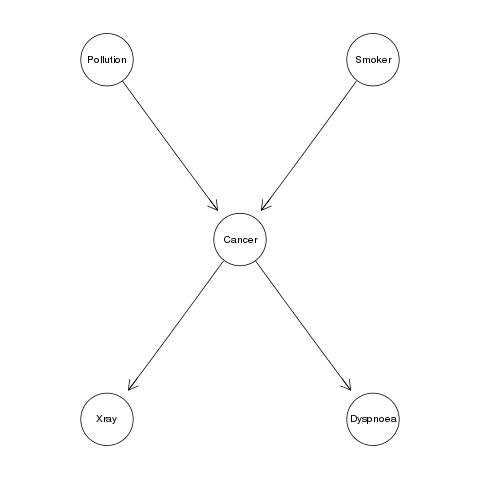

In [3]:
Image("images/cancer.png")

In [4]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Step 1: Define the network structure.
cancer_model = BayesianNetwork(
    [
        ("Pollution", "Cancer"),
        ("Smoker", "Cancer"),
        ("Cancer", "Xray"),
        ("Cancer", "Dyspnoea"),
    ]
)

# Step 2: Define the CPDs.
cpd_poll = TabularCPD(variable="Pollution", variable_card=2, values=[[0.9], [0.1]])
cpd_smoke = TabularCPD(variable="Smoker", variable_card=2, values=[[0.3], [0.7]])
cpd_cancer = TabularCPD(
    variable="Cancer",
    variable_card=2,
    values=[[0.03, 0.05, 0.001, 0.02], [0.97, 0.95, 0.999, 0.98]],
    evidence=["Smoker", "Pollution"],
    evidence_card=[2, 2],
)
cpd_xray = TabularCPD(
    variable="Xray",
    variable_card=2,
    values=[[0.9, 0.2], [0.1, 0.8]],
    evidence=["Cancer"],
    evidence_card=[2],
)
cpd_dysp = TabularCPD(
    variable="Dyspnoea",
    variable_card=2,
    values=[[0.65, 0.3], [0.35, 0.7]],
    evidence=["Cancer"],
    evidence_card=[2],
)

# Step 3: Add the CPDs to the model.
cancer_model.add_cpds(cpd_poll, cpd_smoke, cpd_cancer, cpd_xray, cpd_dysp)

# Step 4: Check if the model is correctly defined.
cancer_model.check_model()

True

# 3. Generating a Random Model
pgmpy offers methods to:
1. Generate a completely random network
2. Given a network structure, generate random CPDs.

### Generate a completely random model

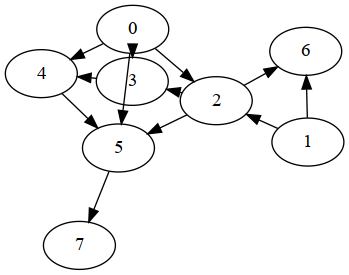

In [5]:
from pgmpy.models import BayesianNetwork

random_model = BayesianNetwork.get_random(n_nodes=8, edge_prob=0.4, n_states=2, latents=True)

# Visualize the network
viz = random_model.to_graphviz()
viz.draw('random.png', prog='neato')
Image('random.png')

In [6]:
import pprint

# Access attributes of the model
nodes = random_model.nodes()
edges = random_model.edges()
cpds = random_model.get_cpds()

print(f"Nodes in the model: {nodes} \n")
print(f"Edges in the model: {edges} \n")
print(f"CPDs in the model: ")
pprint.pp(cpds)

Nodes in the model: [0, 2, 3, 4, 5, 6, 7, 1] 

Edges in the model: [(0, 2), (0, 3), (0, 4), (0, 5), (2, 3), (2, 5), (2, 6), (3, 4), (4, 5), (5, 7), (1, 2), (1, 6)] 

CPDs in the model: 
[<TabularCPD representing P(0:2) at 0x7e73ca74ec50>,
 <TabularCPD representing P(2:2 | 0:2, 1:2) at 0x7e73ca74ddb0>,
 <TabularCPD representing P(3:2 | 0:2, 2:2) at 0x7e73ca74dd80>,
 <TabularCPD representing P(4:2 | 0:2, 3:2) at 0x7e73ca74e200>,
 <TabularCPD representing P(5:2 | 0:2, 2:2, 4:2) at 0x7e73ca74dbd0>,
 <TabularCPD representing P(6:2 | 2:2, 1:2) at 0x7e73ca74dab0>,
 <TabularCPD representing P(7:2 | 5:2) at 0x7e73ca74cf40>,
 <TabularCPD representing P(1:2) at 0x7e73ca74dd50>]


### Generate random CPDs for a given network structure

In [7]:
# Taking the example of the cancer model. 

cancer_random = BayesianNetwork(
    [
        ("Pollution", "Cancer"),
        ("Smoker", "Cancer"),
        ("Cancer", "Xray"),
        ("Cancer", "Dyspnoea"),
    ]
)

cancer_random.get_random_cpds(n_states=3, inplace=True)

# Access attributes of the model
nodes = cancer_random.nodes()
edges = cancer_random.edges()
cpds = cancer_random.get_cpds()

print(f"Nodes in the model: {nodes} \n")
print(f"Edges in the model: {edges} \n")
print(f"CPDs in the model: ")
pprint.pp(cpds)

Nodes in the model: ['Pollution', 'Cancer', 'Smoker', 'Xray', 'Dyspnoea'] 

Edges in the model: [('Pollution', 'Cancer'), ('Cancer', 'Xray'), ('Cancer', 'Dyspnoea'), ('Smoker', 'Cancer')] 

CPDs in the model: 
[<TabularCPD representing P(Pollution:3) at 0x7e73ca74eb30>,
 <TabularCPD representing P(Cancer:3 | Pollution:3, Smoker:3) at 0x7e73ca74ff40>,
 <TabularCPD representing P(Smoker:3) at 0x7e73ca74e020>,
 <TabularCPD representing P(Xray:3 | Cancer:3) at 0x7e73ca74d9c0>,
 <TabularCPD representing P(Dyspnoea:3 | Cancer:3) at 0x7e73ca74ceb0>]
